# Лабораторная работа №4. Кластеризация

**Цель работы**: изучение алгоритмов кластеризации, приобретение навыков оценки качества разбиения данных на кластеры и интерпретации результатов.

**Датасет**: https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset

**Описание**:

В данном исследовании были использованы семь различных видов сухой фасоли с учетом таких характеристик, как форма, вид, тип и структура, в зависимости от рыночной ситуации. Была разработана система компьютерного зрения для различения семи различных зарегистрированных сортов сухой фасоли со схожими характеристиками с целью получения единой классификации семян. Для построения модели классификации были получены изображения 13 611 зерен 7 различных зарегистрированных видов сухой фасоли с помощью камеры высокого разрешения. Изображения фасоли, полученные с помощью системы компьютерного зрения, были подвергнуты этапам сегментации и извлечения признаков. В результате было получено в общей сложности 16 признаков: 12 измерений и 4 формы.

| Переменная          | Описание                                                                                                                              |
|---------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| Area                | Площадь зоны боба и количество пикселей в её границах.                                                                                |
| Perimeter           | Длина периметра (границы) боба.                                                                                                       |
| MajorAxisLength     | Расстояние между концами самой длинной линии, которую можно провести через боб.                                                       |
| MinorAxisLength     | Длина самой длинной линии, которую можно провести через боб перпендикулярно главной оси.                                              |
| AspectRation        | Определяет соотношение между длиной главной и малой осей (L и l).                                                                     |
| Eccentricity        | Эксцентриситет эллипса, имеющего те же моменты, что и область боба.                                                                   |
| ConvexArea          | Количество пикселей в наименьшем выпуклом многоугольнике, который может содержать область боба.                                       |
| EquivDiameter       | Диаметр круга, имеющего ту же площадь, что и область боба.                                                                            |
| Extent              | Отношение количества пикселей в ограничивающем прямоугольнике к площади боба.                                                         |
| Solidity            | Отношение количества пикселей в области боба к количеству пикселей в его выпуклой оболочке.                                           |
| roundness           | Рассчитывается по формуле: (4π * Area) / (Perimeter²).                                                                                |
| Compactness         | Измеряет округлость объекта: EquivDiameter / MajorAxisLength.                                                                         |
| ShapeFactor1        | Фактор формы 1.                                                                                                                       |
| ShapeFactor2        | Фактор формы 2.                                                                                                                       |
| ShapeFactor3        | Фактор формы 3.                                                                                                                       |
| ShapeFactor4        | Фактор формы 4.                                                                                                                       |
| Class               | Сорт боба: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz или Sira.                                                                   |

---

## Описание данных

In [8]:
import pandas as pd

df = pd.read_csv('..\datasets\Dry_Bean.csv')

print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Artur\AppData\Local\Temp\ipykernel_21316\1782844147.py:3: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\datasets\Dry_Bean.csv')



---

## Дескриптивный анализ

Т.к. Class - строчная категориальная переменная, преобразуем её в числовую категориальную.

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Class_encoded'] = label_encoder.fit_transform(df['Class'])

class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Соответствие классов и числовых меток:")
for class_name, numeric_label in class_mapping.items():
    print(f"{class_name}: {numeric_label}")

class_mapping_dict = class_mapping.copy()

df = df.drop('Class', axis=1)
df = df.rename(columns={'Class_encoded': 'Class'})

Соответствие классов и числовых меток:
BARBUNYA: 0
BOMBAY: 1
CALI: 2
DERMASON: 3
HOROZ: 4
SEKER: 5
SIRA: 6


                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.

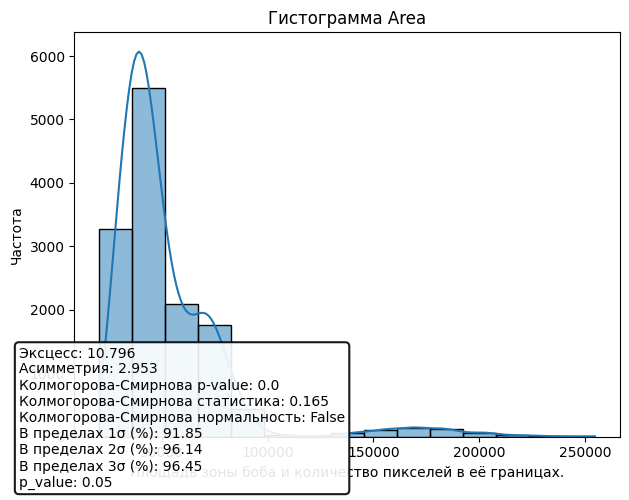

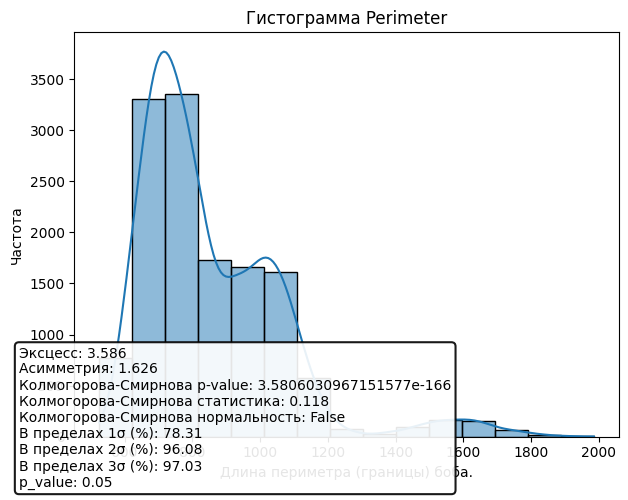

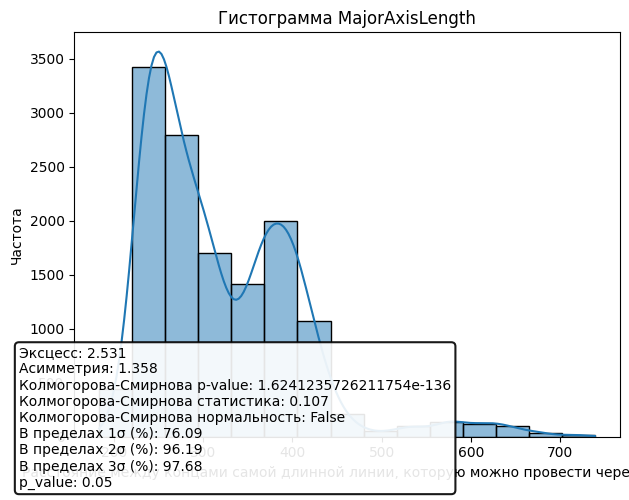

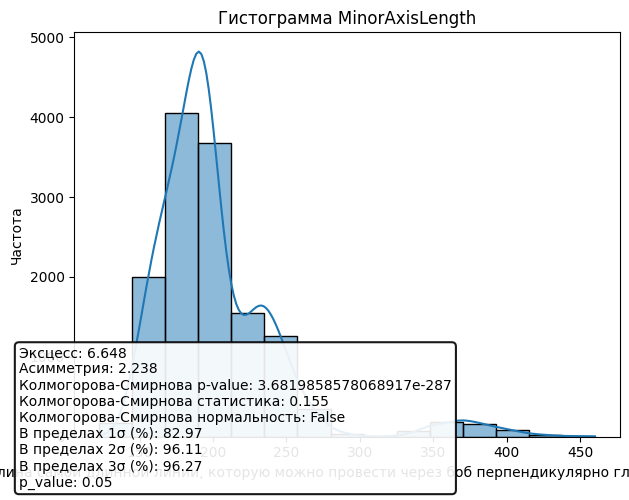

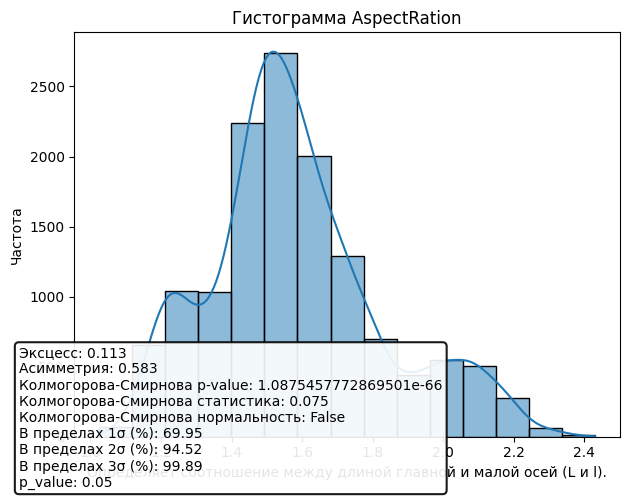

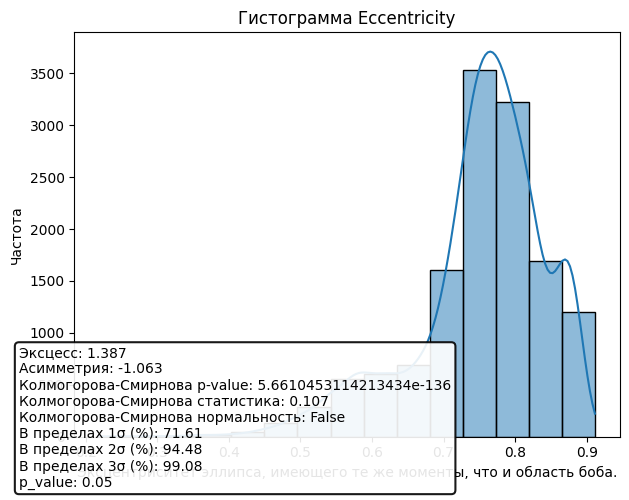

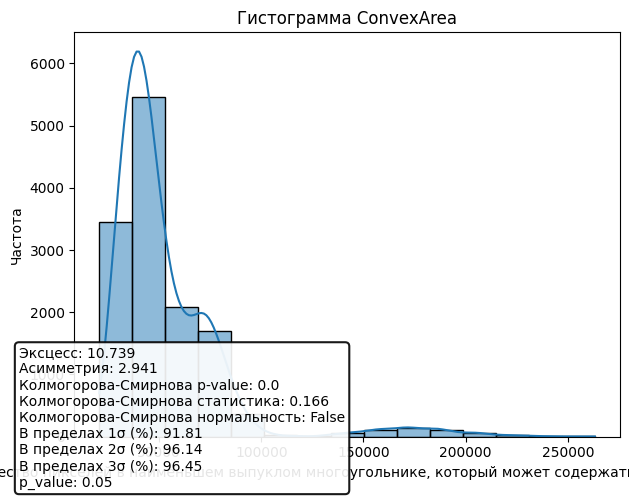

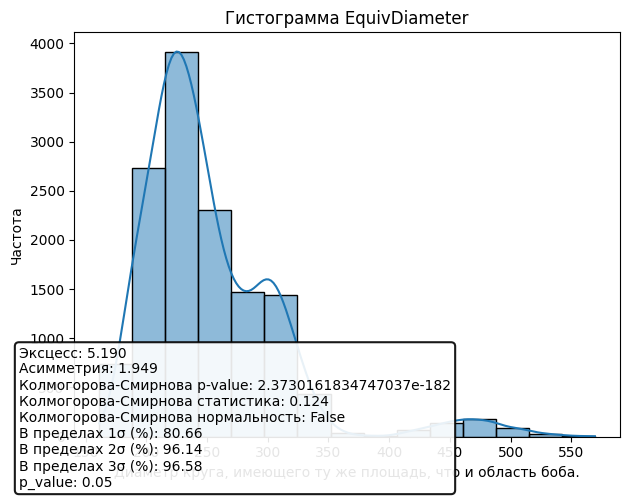

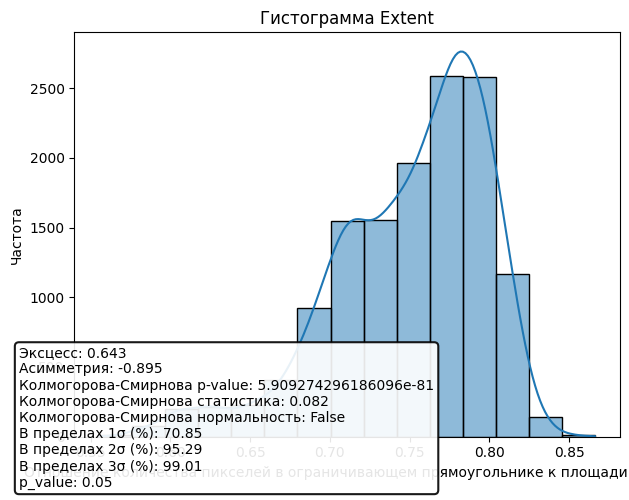

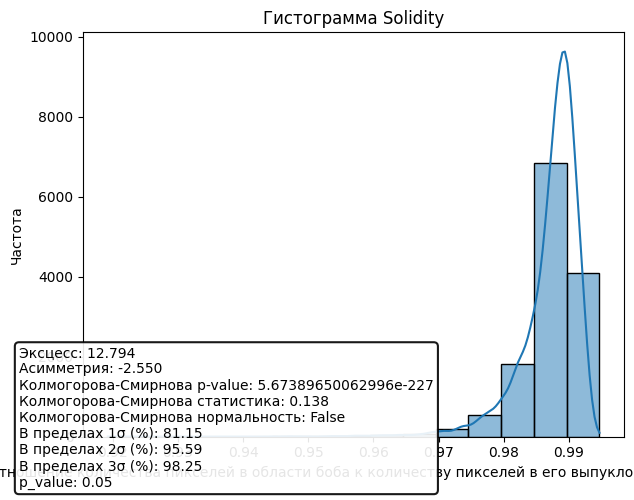

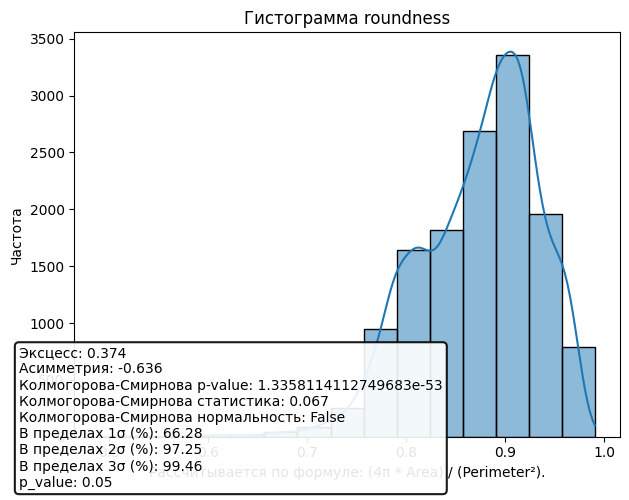

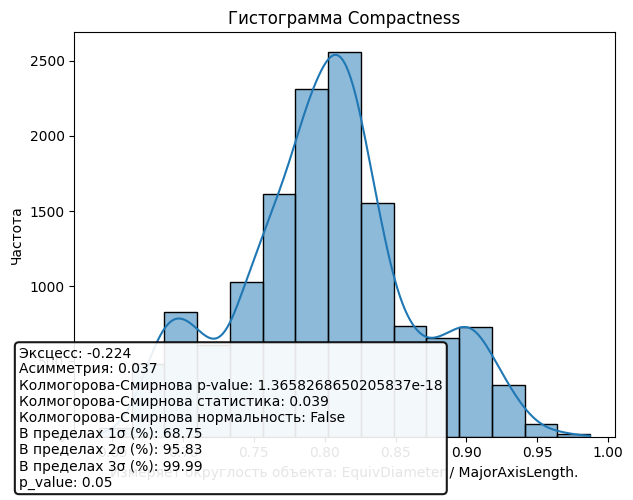

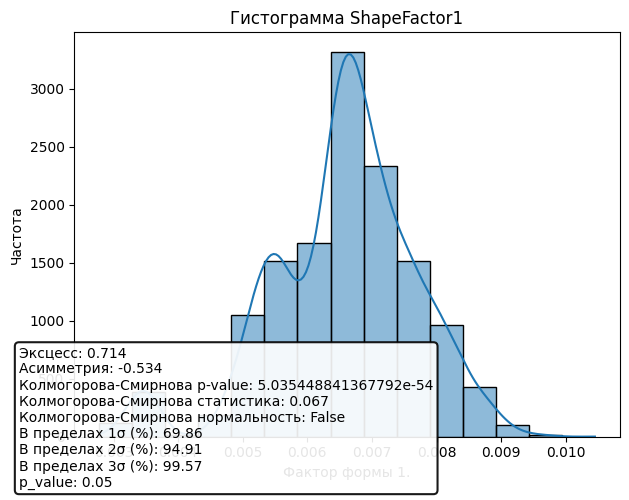

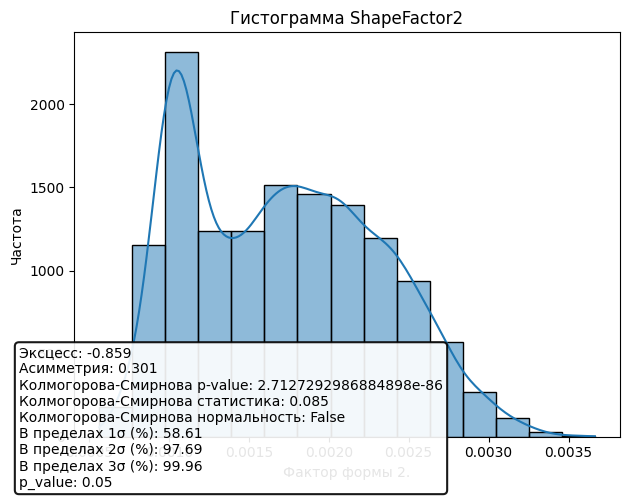

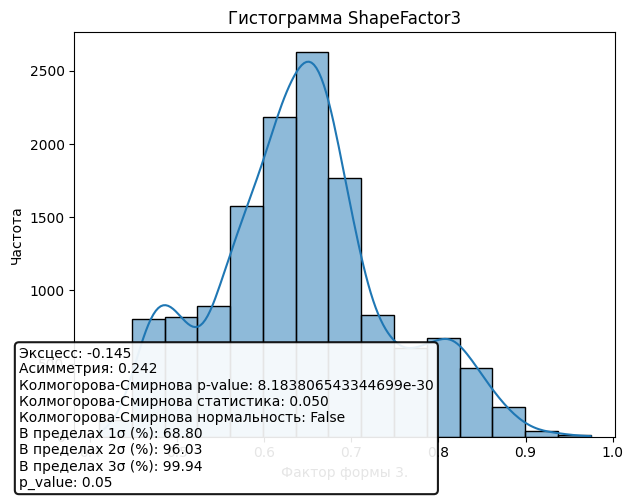

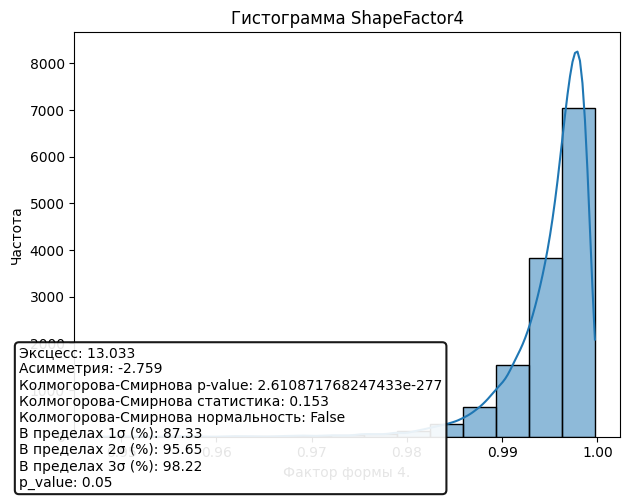

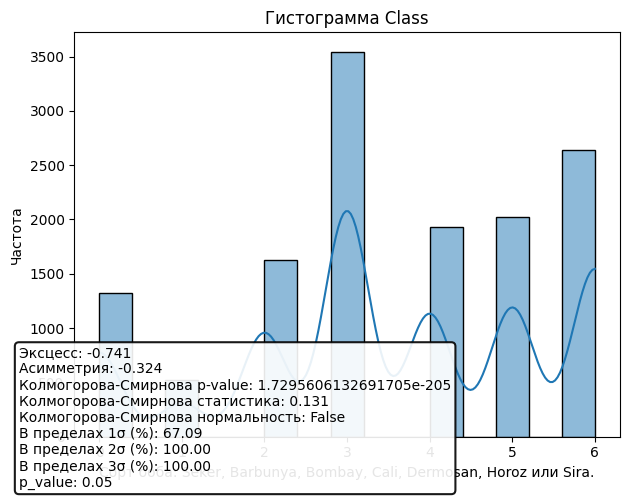

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm, skew, kurtosis, kstest
import numpy

ALPHA = 0.05

print(df.describe())

descriptions = {
    "Area": "Площадь зоны боба и количество пикселей в её границах.",
    "Perimeter": "Длина периметра (границы) боба.",
    "MajorAxisLength": "Расстояние между концами самой длинной линии, которую можно провести через боб.",
    "MinorAxisLength": "Длина самой длинной линии, которую можно провести через боб перпендикулярно главной оси.",
    "AspectRation": "Определяет соотношение между длиной главной и малой осей (L и l).",
    "Eccentricity": "Эксцентриситет эллипса, имеющего те же моменты, что и область боба.",
    "ConvexArea": "Количество пикселей в наименьшем выпуклом многоугольнике, который может содержать область боба.",
    "EquivDiameter": "Диаметр круга, имеющего ту же площадь, что и область боба.",
    "Extent": "Отношение количества пикселей в ограничивающем прямоугольнике к площади боба.",
    "Solidity": "Отношение количества пикселей в области боба к количеству пикселей в его выпуклой оболочке.",
    "roundness": "Рассчитывается по формуле: (4π * Area) / (Perimeter²).",
    "Compactness": "Измеряет округлость объекта: EquivDiameter / MajorAxisLength.",
    "ShapeFactor1": "Фактор формы 1.",
    "ShapeFactor2": "Фактор формы 2.",
    "ShapeFactor3": "Фактор формы 3.",
    "ShapeFactor4": "Фактор формы 4.",
    "Class": "Сорт боба: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz или Sira."
}

def three_sigma(column_data):
    mean_value = numpy.mean(column_data)
    std_value = numpy.std(column_data)

    bounds_1sigma = {
        'lower': mean_value - std_value,
        'upper': mean_value + std_value
    }

    bounds_2sigma = {
        'lower': mean_value - std_value * 2,
        'upper': mean_value + std_value * 2
    }

    bounds_3sigma = {
        'lower': mean_value - std_value * 3,
        'upper': mean_value + std_value * 3
    }

    total_count = len(column_data)

    within_1sigma = ((column_data >= bounds_1sigma['lower']) & 
                    (column_data <= bounds_1sigma['upper'])).sum()
    within_1sigma_pct = (within_1sigma / total_count) * 100

    within_2sigma = ((column_data >= bounds_2sigma['lower']) & 
                    (column_data <= bounds_2sigma['upper'])).sum()
    within_2sigma_pct = (within_2sigma / total_count) * 100

    within_3sigma = ((column_data >= bounds_3sigma['lower']) & 
                    (column_data <= bounds_3sigma['upper'])).sum()
    within_3sigma_pct = (within_3sigma / total_count) * 100
    
    return [within_1sigma_pct, within_2sigma_pct, within_3sigma_pct]


for _,column in enumerate(df.columns):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    three_sigma_pct = three_sigma(df[column])
    sb.histplot(df[column], kde=True, bins='sturges')
    kstestObject = kstest(df[column], 'norm', args=(numpy.mean(df[column]), numpy.std(df[column])))

    legendText = (f'Эксцесс: {kurtosis(df[column]):.3f}\n'
              f'Асимметрия: {skew(df[column]):.3f}\n'
              f'Колмогорова-Смирнова p-value: {kstestObject.pvalue}\n'
              f'Колмогорова-Смирнова статистика: {kstestObject.statistic:.3f}\n'
              f'Колмогорова-Смирнова нормальность: {kstestObject.pvalue >= ALPHA}\n'
              f'В пределах 1σ (%): {three_sigma_pct[0]:.2f}\n' # Теоретически 1σ (%) = 68.26
              f'В пределах 2σ (%): {three_sigma_pct[1]:.2f}\n' # Теоретически 2σ (%) = 95.44
              f'В пределах 3σ (%): {three_sigma_pct[2]:.2f}\n' # Теоретически 3σ (%) = 99.72
              f'p_value: {ALPHA}')
    plt.figtext(0.02, 0.01, legendText, 
            ha='left',
            va='bottom',
            fontsize=10,
            bbox=dict(boxstyle='round', 
                      facecolor='white', 
                      edgecolor='black',
                      linewidth=1.5,
                      alpha=0.9))
    plt.subplots_adjust(bottom=0.5)

    plt.title(f'Гистограмма {column}')
    plt.xlabel(descriptions[column])
    plt.ylabel('Частота') 
    plt.tight_layout()